In [1]:
#TODO:
# Make a mega dataset consisting of all subjects labelled
# according to their activities, where every row has 500 attributes.
# Apply PCA and scatter according to activity.



In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import tsfel
%matplotlib inline
import os

In [2]:
combined_dir = os.path.join(os.path.pardir, r"Combined")
folders = ["LAYING","SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIRS"]
classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}
dataset_dir = os.path.join(combined_dir,r"Train")
time = 10
offset = 100

In [10]:
# We will have to do PCA on the acceleration magnitude, right? 
#yessir
#also notebooks take care of path shit by themselves so its better we use the ../ notation
#finesir
#arigato sir
#hopefully this works

In [3]:
master_dataset = pd.DataFrame()
for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))
    for file in files:
        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        df["linear_acc"] = df["accx"] **2 + df["accy"] ** 2 + df["accz"]** 2
        temp = pd.DataFrame([(df["linear_acc"].to_numpy().flatten())])
        temp["activity"] = folder
        master_dataset = pd.concat([master_dataset, temp], ignore_index = True)        

master_dataset

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,activity
0,0.981382,0.982685,0.984772,0.991014,0.991957,0.987176,0.986225,0.980630,0.976677,0.986460,...,0.987941,0.984326,0.986315,0.982113,0.982702,0.987035,0.985976,0.987111,0.982366,LAYING
1,0.993165,0.989138,0.994005,0.999543,1.004060,1.001994,0.998885,0.997216,0.993052,0.993806,...,0.991251,0.996607,0.998806,1.001779,1.008806,1.005365,1.001250,1.003021,0.998748,LAYING
2,0.989889,0.992328,0.995144,0.994290,0.994649,0.990959,0.985261,0.984080,0.993255,1.005987,...,1.005300,1.003439,0.992190,0.987591,0.990027,0.991893,0.988948,0.987491,0.988619,LAYING
3,1.003003,1.000165,0.996369,0.995168,0.992990,0.995212,0.997920,0.994808,0.997712,1.000126,...,1.003198,0.994433,0.993846,0.994699,0.995511,0.998258,0.998304,0.995051,0.991391,LAYING
4,0.999798,0.997792,1.000999,1.003594,1.004107,1.005161,1.001687,1.003346,1.006965,1.006614,...,1.006513,0.996673,0.994095,0.991356,0.991930,0.990347,0.989033,0.994008,0.996868,LAYING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,1.313149,1.496651,1.657864,1.788792,1.964748,2.176348,2.218402,2.068605,1.880712,1.654676,...,1.883225,1.689585,1.404288,1.106515,0.860272,0.886572,0.969258,0.957187,0.965843,WALKING_UPSTAIRS
122,0.645240,0.687641,0.772740,0.884074,1.015710,1.155363,1.233513,1.327943,1.483545,1.758774,...,1.461972,1.645756,1.355183,1.007496,0.821142,0.505451,0.397018,0.435017,0.337881,WALKING_UPSTAIRS
123,0.548796,0.672201,0.871850,0.950930,0.854911,0.886019,0.922935,0.969559,1.098581,1.507499,...,2.598404,1.945510,1.325856,1.150704,1.014043,0.725299,0.705644,1.065750,1.271324,WALKING_UPSTAIRS
124,1.059330,1.024984,0.890988,1.011086,0.924324,0.873101,0.833131,0.642193,0.606104,0.555885,...,0.569460,0.593311,0.642203,0.737246,0.780754,0.758168,0.791968,0.890852,1.053665,WALKING_UPSTAIRS


In [4]:
data_df = master_dataset[np.arange(0, 500)]
print(master_dataset['activity'].unique())
scaler = StandardScaler()
scaler.fit(data_df)
scaled_data = scaler.transform(data_df)

['LAYING' 'SITTING' 'STANDING' 'WALKING' 'WALKING_DOWNSTAIRS'
 'WALKING_UPSTAIRS']


In [5]:
principal=PCA(n_components=2)
principal.fit(scaled_data)
reduced_data=principal.transform(scaled_data)

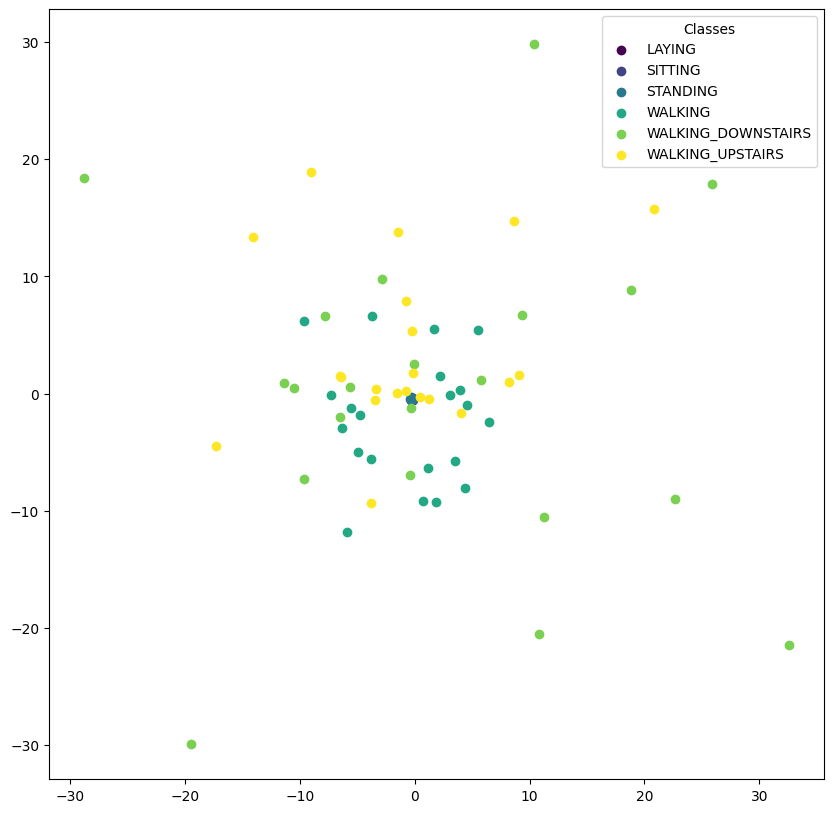

In [6]:
le = LabelEncoder()
labels = le.fit_transform(master_dataset['activity'])
unique_labels = np.unique(labels)
cmap = plt.get_cmap('viridis', len(unique_labels))
plt.figure(figsize=(10, 10))
for i, label in enumerate(unique_labels):
    plt.scatter(reduced_data[:, 0][labels==label], reduced_data[:, 1][labels==label], color=cmap(i), label=le.inverse_transform([label])[0])

plt.legend(title='Classes')
plt.show()

In [17]:
master_dataset.iloc[:, :-1].values

array([[0.98138236, 0.98268484, 0.98477228, ..., 0.98597619, 0.9871108 ,
        0.98236632],
       [0.99316494, 0.98913792, 0.99400533, ..., 1.00124978, 1.00302114,
        0.99874781],
       [0.9898891 , 0.99232811, 0.99514404, ..., 0.988948  , 0.98749115,
        0.98861876],
       ...,
       [0.54879584, 0.67220067, 0.87184995, ..., 0.70564415, 1.06574985,
        1.27132419],
       [1.0593298 , 1.024984  , 0.89098823, ..., 0.791968  , 0.89085179,
        1.0536655 ],
       [0.44950381, 0.63261882, 0.79955778, ..., 0.38567025, 0.47811225,
        0.65965402]])

In [ ]:
feature_df = pd.DataFrame()
cfg = tsfel.get_features_by_domain()
for i in range(len(master_dataset)):
    time_series = master_dataset.iloc[i, :-1]
    features = tsfel.time_series_features_extractor(cfg, time_series)
    feature_df = pd.concat([feature_df, features], ignore_index=True)

In [27]:
feature_df['Activity']=master_dataset.iloc[:, -1]
display(feature_df)

,0_Absolute energy,0_Area under the curve,0_Autocorrelation,0_Average power,0_Centroid,0_ECDF Percentile Count_0,0_ECDF Percentile Count_1,0_ECDF Percentile_0,0_ECDF Percentile_1,0_ECDF_0,...,0_Wavelet variance_1,0_Wavelet variance_2,0_Wavelet variance_3,0_Wavelet variance_4,0_Wavelet variance_5,0_Wavelet variance_6,0_Wavelet variance_7,0_Wavelet variance_8,0_Zero crossing rate,Activity
0,486.076839,4.919999,2.0,97.410188,2.494455,100.0,400.0,0.982049,0.990229,0.002,...,0.005321,0.011543,0.020073,0.031101,0.044612,0.060359,0.078127,0.097793,0.0,LAYING
1,493.699440,4.958356,2.0,98.937763,2.496359,100.0,400.0,0.989299,0.997952,0.002,...,0.005485,0.012110,0.021027,0.032260,0.045780,0.061501,0.079356,0.099291,0.0,LAYING
2,488.775558,4.933497,2.0,97.951014,2.496105,100.0,400.0,0.982106,0.994710,0.002,...,0.005475,0.011940,0.021053,0.032130,0.045018,0.060041,0.077352,0.096851,0.0,LAYING
3,500.294418,4.991387,2.0,100.259402,2.494590,100.0,400.0,0.994699,1.005580,0.002,...,0.005479,0.011826,0.020668,0.031754,0.044939,0.060314,0.077948,0.097826,0.0,LAYING
4,502.040010,5.000034,2.0,100.609220,2.493265,100.0,400.0,0.995372,1.008743,0.002,...,0.005460,0.011706,0.020407,0.031690,0.045574,0.061881,0.080371,0.100867,0.0,LAYING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,718.561110,5.596246,6.0,144.000222,2.487187,100.0,400.0,0.792199,1.415847,0.002,...,0.130657,0.327386,0.626217,1.002398,1.449937,1.958169,2.487175,2.957794,0.0,WALKING_UPSTAIRS
122,910.947049,5.928588,4.0,182.554519,2.476602,100.0,400.0,0.632811,1.618108,0.002,...,0.458829,0.835732,1.422113,2.448635,3.775851,5.014051,5.753432,5.787370,0.0,WALKING_UPSTAIRS
123,1025.130144,6.022862,4.0,205.436903,2.465292,100.0,400.0,0.599844,1.856327,0.002,...,0.723380,1.517723,2.588479,4.006810,5.621489,6.947978,7.459615,6.995953,0.0,WALKING_UPSTAIRS
124,750.494969,5.581118,5.0,150.399793,2.486029,100.0,400.0,0.758168,1.430162,0.002,...,0.263976,0.594599,1.027818,1.560821,2.175053,2.778421,3.194846,3.281220,0.0,WALKING_UPSTAIRS


In [30]:
scaler_new = StandardScaler()
feature_data_df = feature_df.iloc[:, :-1]
scaled_feature_data = scaler_new.fit_transform(feature_data_df)
principal_new=PCA(n_components=2)
principal_new.fit(scaled_feature_data)
reduced_feature_data=principal_new.transform(scaled_feature_data)


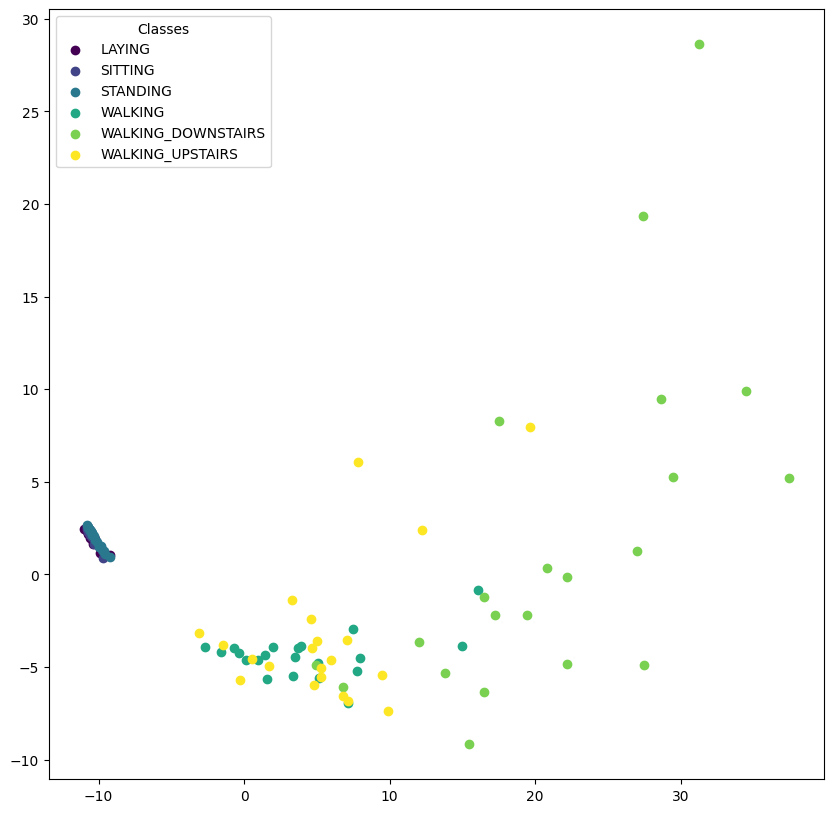

In [33]:
le = LabelEncoder()
labels = le.fit_transform(master_dataset['activity'])
unique_labels = np.unique(labels)
cmap = plt.get_cmap('viridis', len(unique_labels))
plt.figure(figsize=(10, 10))
for i, label in enumerate(unique_labels):
    plt.scatter(reduced_feature_data[:, 0][labels==label], reduced_feature_data[:, 1][labels==label], color=cmap(i), label=le.inverse_transform([label])[0])

plt.legend(title='Classes')
plt.show()